In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/pml/blood_pressure.csv")
df.head(100)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
95,96,Female,46-59,140,154
96,97,Female,46-59,144,169
97,98,Female,46-59,142,145
98,99,Female,46-59,145,137


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df['bp_change'] = df['bp_after'] - df['bp_before']

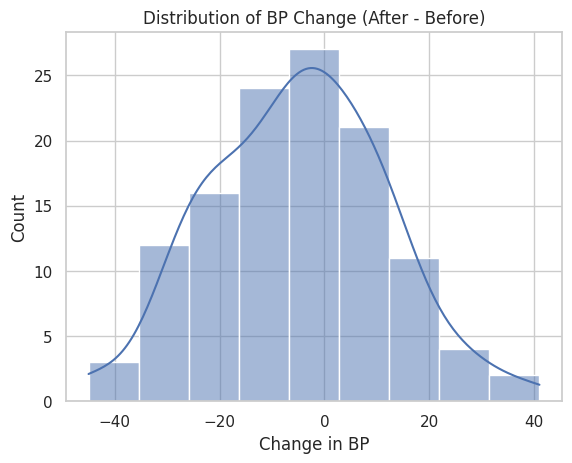

In [30]:
sns.histplot(df['bp_change'], kde=True)
plt.title('Distribution of BP Change (After - Before)')
plt.xlabel('Change in BP')
plt.show()

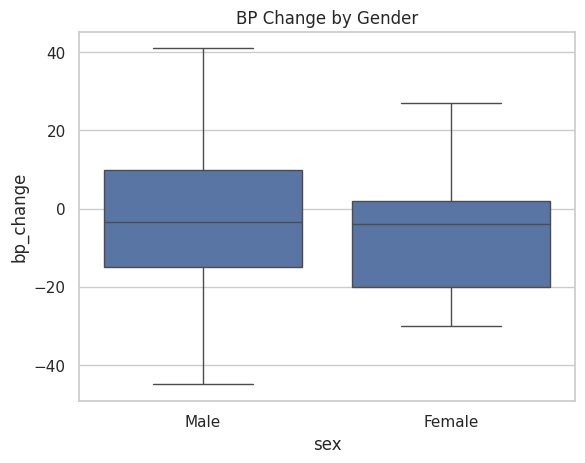

In [31]:
sns.boxplot(data=df, x='sex', y='bp_change')
plt.title('BP Change by Gender')
plt.show()


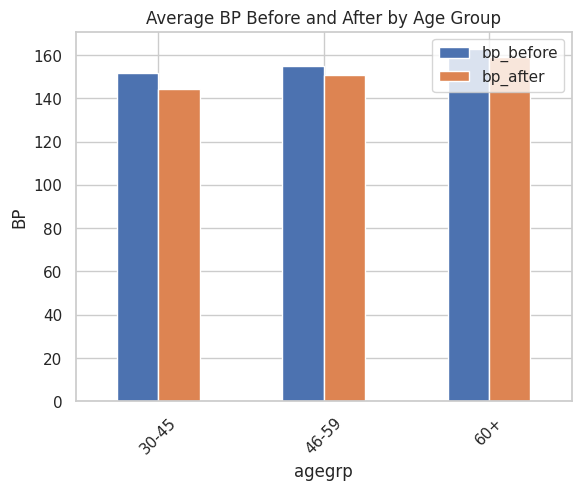

In [34]:
df.groupby('agegrp')[['bp_before', 'bp_after']].mean().plot(kind='bar')
plt.title('Average BP Before and After by Age Group')
plt.ylabel('BP')
plt.xticks(rotation=45)
plt.show()

In [35]:
df.describe()

,patient,bp_before,bp_after,bp_change
count,120.000000,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333,-5.091667
std,34.785054,11.389845,14.177622,16.713601
min,1.000000,138.000000,125.000000,-45.000000
25%,30.750000,147.000000,140.750000,-18.000000
50%,60.500000,154.500000,149.500000,-3.500000
75%,90.250000,164.000000,161.000000,7.000000
max,120.000000,185.000000,185.000000,41.000000


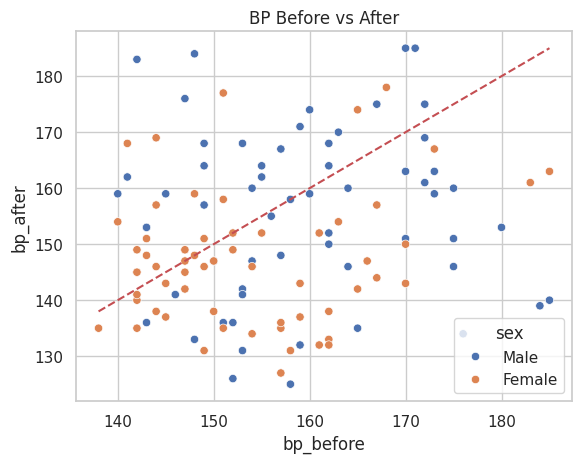

In [36]:
sns.scatterplot(data=df, x='bp_before', y='bp_after', hue='sex')
plt.plot([df['bp_before'].min(), df['bp_before'].max()],
         [df['bp_before'].min(), df['bp_before'].max()],
         'r--')  # reference line
plt.title('BP Before vs After')
plt.show()

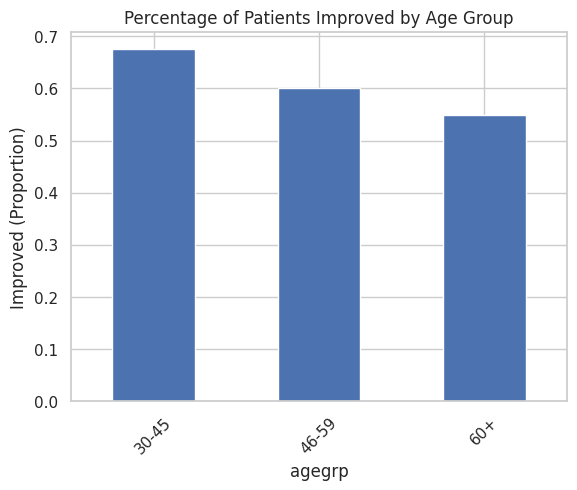

In [38]:
df['improved'] = df['bp_after'] < df['bp_before']
df.groupby('agegrp')['improved'].mean().plot(kind='bar')
plt.title('Percentage of Patients Improved by Age Group')
plt.ylabel('Improved (Proportion)')
plt.xticks(rotation=45)
plt.show()
